In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

In [2]:
excel_data_df = pd.ExcelFile(r'../data/egg.xlsx')
excel_data_df = excel_data_df.parse(excel_data_df.sheet_names[0])

In [3]:
result_df = pd.ExcelFile(r'../data/egg-result.xlsx')
result_df = result_df.parse(result_df.sheet_names[0])
result_set = result_df.iloc[:, 1].tolist()

In [4]:
# for idx, header in enumerate(excel_data_df.columns.tolist()):
#     print(idx, header)

In [5]:
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Nhân sự")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Đối ngoại")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Chuyên môn")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Hậu cần")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Truyền thông")]
excel_data_df.reset_index(drop=True, inplace=True)
excel_data_df.fillna("", inplace = True)
# filter = [0, 1, 5, 7, 9, 11, 14, 15, 16, 17, 18, 19, 22, 23, 24, 26, 28, 30, 31, 33, 34, 35, 36, 37, 40, 41, 43, 44, 45, 52, 53, 55, 58, 60, 61, 65, 68, 69, 74, 77, 84, 86, 87, 88, 89, 96, 97, 98, 102, 104, 106, 107, 108, 110, 111, 112, 113, 114, 116, 117, 120, 127, 129, 134, 135, 137, 138, 139, 140, 140, 142, 145, 146, 149, 152, 154, 155]
# excel_data_df = excel_data_df.iloc[filter]
# excel_data_df.reset_index(drop=True, inplace=True)
# identity = list(excel_data_df.index.values)
identity = excel_data_df.iloc[:, 1].tolist()

In [6]:
import sys; sys.path.insert(0, '..')
from app.loader import loader
from app.ssmc_fcm import SSMC_FCM

/home/hoangtc125/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- Algo Clustering Config:
 {
    "SERVICE_NAME": "ALGO_CLUSTERING",
    "STOPWORD_PATH": "/media/hoangtc125/E/DATN/algo-clustering-service/resources/vn_stopword.txt",
    "FEATURES_PATH": "/media/hoangtc125/E/DATN/algo-clustering-service/resources/features.txt"
}
No GPU available, using the CPU instead.


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [7]:
fields_chosen = {
    # # sample data
    # 2: (loader.feature_engineering, 1),

    # egg data
    3: (loader.multilabel_binarizing, 1),
    4: (loader.multilabel_binarizing, 1),
    5: (loader.feature_engineering, 1),
    6: (loader.feature_engineering, 1),
    7: (loader.multilabel_binarizing, 1),
    8: (loader.multilabel_binarizing, 1),
    9: (loader.multilabel_binarizing, 1),
    10: (loader.feature_engineering, 1),

    # # nha data BCM
    # 40: (loader.feature_engineering, 1),
    # 43: (loader.feature_engineering, 1),
    # 46: (loader.feature_engineering, 1),
    # 49: (loader.feature_engineering, 1),
    # 55: (loader.feature_engineering, 1),
    # 58: (loader.feature_engineering, 1),

    # # nha data BCT
    # 41: (loader.feature_engineering, 1),
    # 44: (loader.feature_engineering, 1),
    # 47: (loader.feature_engineering, 1),
    # 50: (loader.feature_engineering, 1),
    # 62: (loader.feature_engineering, 1),
    # 65: (loader.feature_engineering, 1),
    # 68: (loader.feature_engineering, 1),
    # 71: (loader.feature_engineering, 1),

    # # nha data BDN
    # 41: (loader.feature_engineering, 1),
    # 44: (loader.feature_engineering, 1),
    # 47: (loader.feature_engineering, 1),
    # 50: (loader.feature_engineering, 1),
    # 74: (loader.feature_engineering, 1),
    # 77: (loader.feature_engineering, 1),
    # 80: (loader.feature_engineering, 1),

    # # sinno data nhan su
    # 10: (loader.feature_engineering, 1),
    # 18: (loader.feature_engineering, 1),
    # 19: (loader.feature_engineering, 1),
    # 20: (loader.multilabel_binarizing, 1),
    # 21: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),

    # # sinno data doi ngoai
    # 10: (loader.feature_engineering, 1),
    # 29: (loader.feature_engineering, 1),
    # 30: (loader.feature_engineering, 1),
    # 31: (loader.feature_engineering, 1),
    # 32: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),

    # # sinno data chuyen mon
    # 10: (loader.feature_engineering, 1),
    # 13: (loader.feature_engineering, 1),
    # 14: (loader.feature_engineering, 1),
    # 15: (loader.feature_engineering, 1),
    # 16: (loader.feature_engineering, 1),
    # 17: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),

    # # sinno data hau can
    # 10: (loader.feature_engineering, 1),
    # 33: (loader.feature_engineering, 1),
    # 39: (loader.feature_engineering, 1),
    # 40: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),

    # # sinno data truyen thong
    # 10: (loader.feature_engineering, 1),
    # 22: (loader.feature_engineering, 1),
    # 23: (loader.feature_engineering, 1),
    # 24: (loader.feature_engineering, 1),
    # 25: (loader.feature_engineering, 1),
    # 26: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),
}

In [8]:
from datetime import datetime
vectors = {}
for id_field, config in fields_chosen.items():
    start = datetime.now()
    func = config[0]
    raw_data = excel_data_df.iloc[:, id_field].tolist()
    data = func(raw_data)
    vectors[id_field] = data
    print(f"{round(100 * (list(fields_chosen).index(id_field) + 1) / len(fields_chosen), 2)}% ({datetime.now() - start})")

12.5% (0:00:00.001673)
25.0% (0:00:00.000706)
37.5% (0:00:10.527907)
50.0% (0:00:06.238866)
62.5% (0:00:00.000789)
75.0% (0:00:00.000558)
87.5% (0:00:00.000424)
100.0% (0:00:08.233742)


In [9]:
cluster_fields = list(fields_chosen.keys())
dataset = None
data_field_len = []
data_field_weight = []
for idx, id_field in enumerate(cluster_fields):
    data = np.array(vectors[id_field])
    dataset = data if idx == 0 else np.hstack((dataset, data))
    data_field_len.append(data.shape[1])
    data_field_weight.append(fields_chosen[id_field][1])
dataset.shape, data_field_len, data_field_weight

((158, 2461), [89, 7, 768, 768, 10, 4, 47, 768], [1, 1, 1, 1, 1, 1, 1, 1])

Supervised percentage: 0.0% (0:158)
Cluster members: 
['leducdientin92018@gmail.com', 'kq161204@gmail.com', 'nphuochai4@gmail.com', 'huybla166@gmail.com', 'hoan8e1@gmail.com', 'nam0837305039@gmail.com', 'buivankienvx@gmail.com', 'Tuyen.NT224908@sis.hust.edu.vn', 'tiennma2k23@cvp.vn', 'vuduc477a6@gmail.com', 'vunguyet198@gmail.com', 'thanh8cute@gmail.com', 'hoangtuathat@gmail.com', 'gianghoangtruong1111@gmail.com', 'ntm.cmv@gmail.com', 'quan.ha213639@sis.hust.edu.vn', 'minh.pq225743@sis.hust.edu.vn', 'quanghieptong@gmail.com', 'nhatminh15102004hp@gmail.com', 'hung123ka5@gmail.com', 'anh.mh213652@sis.hust.edu.vn', 'Duyen.TL225968@sis.hust.edu.vn', 'Truong.DV225942@sis.hust.edu.vn', '2004hoangcuc@gmail.com', 'ngocminh2532003@gmail.con', 'pqh0612@gmail.com', 'minhhaihoang2312@gmail.com', 'quang177123@gmail.com', 'hoanganh692004@gmail.com', 'huyductran2606@gmail.com', 'son.nguyenhung.lequydon@gmail.com', 'qhus.t8082@gmail.com', 'viethoanghay123@gmail.com']
['trinhdung01000100@gmail.com', 't

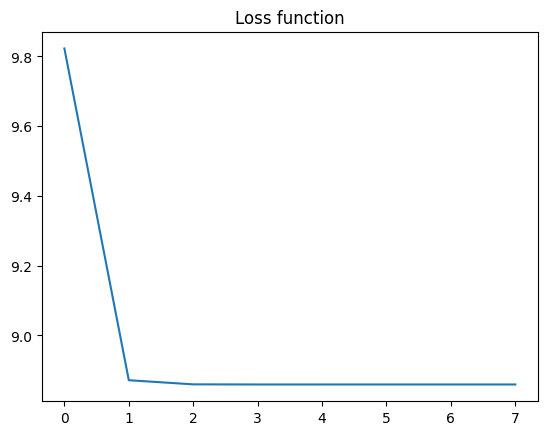

loss functions: 
[9.822612744308339, 8.87164638144891, 8.85980810519801, 8.859469126972119, 8.859455206445183, 8.859454565052632, 8.859454534244012, 8.859454532737846]


In [27]:
supervised_set = [
    [
        
    ],
]
ssmc_fcm = SSMC_FCM(
    dataset=dataset, 
    fields_len=data_field_len, 
    fields_weight=data_field_weight,
    n_clusters=5, 
    identity=identity,
    supervised_set=supervised_set, 
)
ssmc_fcm.clustering()
ssmc_fcm.show_cluster_members()
ssmc_fcm.show_loss_function()

In [28]:
identity_mapping = {iden: idx for idx, iden in enumerate(identity)}
for cluster in ssmc_fcm.pred_labels:
    count = sum([cluster.count(x) for x in result_set])
    print(f"Accuracy: {round(100 * count / len(result_set), 2)}% ({count} in {len(cluster)} of {len(ssmc_fcm.dataset)})")
    # print([identity.index(i) for i in cluster])
    # display(excel_data_df.loc[[identity.index(i) for i in cluster]].iloc[:, [1, *cluster_fields]])

Accuracy: 17.5% (7 in 33 of 158)
Accuracy: 25.0% (10 in 64 of 158)
Accuracy: 20.0% (8 in 33 of 158)
Accuracy: 0.0% (0 in 0 of 158)
Accuracy: 27.5% (11 in 28 of 158)


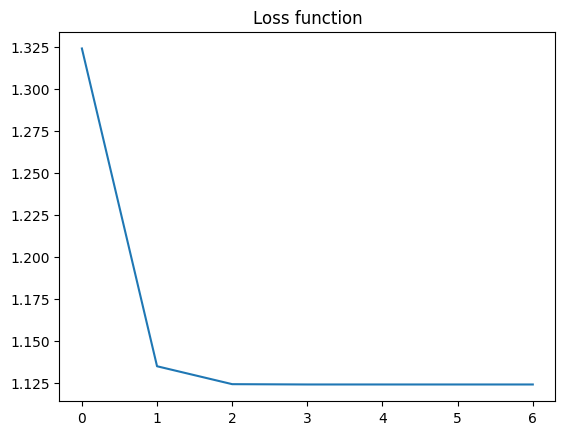

loss functions: 
[1.324258996923525, 1.134946186769965, 1.12427352597247, 1.124090158532648, 1.124088467801842, 1.1240884518487102, 1.1240884516731402]
[1, 0, 0, 0, 0, 0, 0, 0] 0
Accuracy: 12.5% (5 in 11 of 158)
Accuracy: 20.0% (8 in 40 of 158)
Accuracy: 0.0% (0 in 0 of 158)
Accuracy: 0.0% (0 in 0 of 158)
Accuracy: 57.5% (23 in 107 of 158)



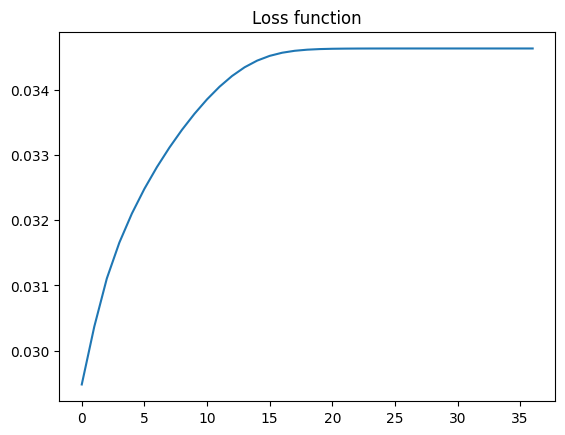

loss functions: 
[0.029478441770955887, 0.030367236465018956, 0.031105606862466138, 0.03165648765667808, 0.0321025060147982, 0.03248237767668141, 0.032816543956790976, 0.03311651053488545, 0.03338847453752122, 0.033635041553077775, 0.033856251620491884, 0.034050446181631756, 0.03421526089888589, 0.03434882084285911, 0.03445094141179369, 0.03452388922926757, 0.03457227113431884, 0.03460203268438735, 0.03461909030277891, 0.034628286609337484, 0.03463300990053833, 0.034635352320543156, 0.034636487786996364, 0.034637030999966435, 0.03463728922051616, 0.03463741169858017, 0.03463746979625862, 0.03463749738506975, 0.03463751050433221, 0.034637516751170654, 0.03463751972897567, 0.03463752114972154, 0.03463752182802935, 0.03463752215203016, 0.03463752230684945, 0.034637522380844284, 0.034637522416219584]
[0, 1, 0, 0, 0, 0, 0, 0] 1
Accuracy: 20.0% (8 in 21 of 158)
Accuracy: 35.0% (14 in 53 of 158)
Accuracy: 35.0% (14 in 77 of 158)
Accuracy: 0.0% (0 in 3 of 158)
Accuracy: 0.0% (0 in 4 of 158)



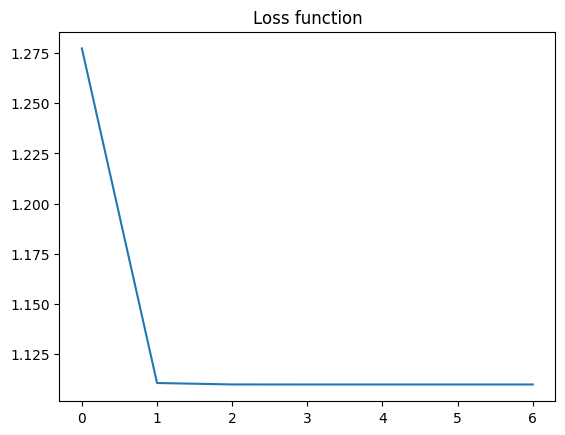

loss functions: 
[1.277295972987377, 1.1105556650957726, 1.1098333899400448, 1.1098223300654808, 1.109821878074492, 1.1098218558955761, 1.1098218547540946]
[0, 0, 1, 0, 0, 0, 0, 0] 2
Accuracy: 50.0% (20 in 70 of 158)
Accuracy: 2.5% (1 in 1 of 158)
Accuracy: 0.0% (0 in 2 of 158)
Accuracy: 37.5% (15 in 85 of 158)
Accuracy: 0.0% (0 in 0 of 158)



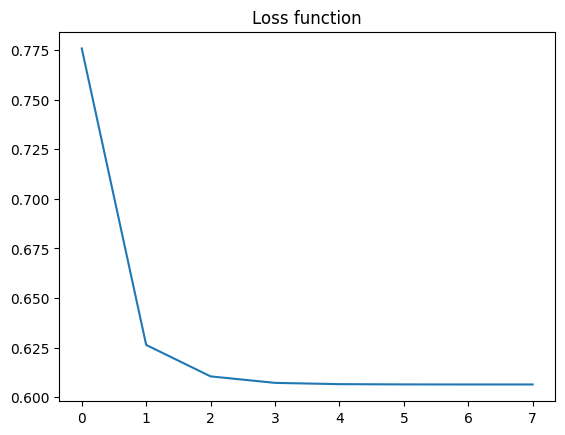

loss functions: 
[0.7757644881154215, 0.6263472411946727, 0.6104980744656613, 0.607235086394037, 0.6065886029037899, 0.606456397195061, 0.6064291235237224, 0.606423486100038]
[0, 0, 0, 1, 0, 0, 0, 0] 3
Accuracy: 47.5% (19 in 52 of 158)
Accuracy: 12.5% (5 in 64 of 158)
Accuracy: 15.0% (6 in 30 of 158)
Accuracy: 7.5% (3 in 6 of 158)
Accuracy: 7.5% (3 in 6 of 158)



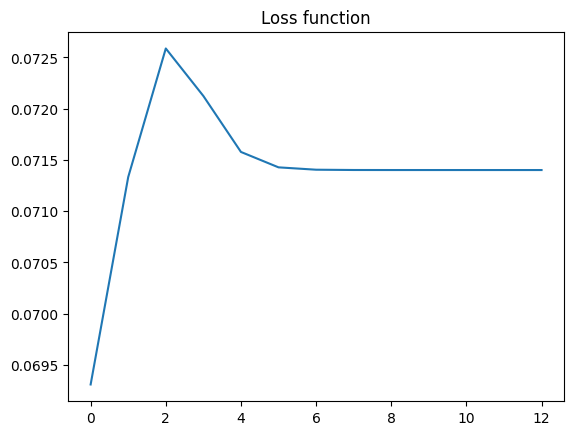

loss functions: 
[0.06930876569549693, 0.0713323495571657, 0.07258656986989157, 0.07212310091861822, 0.07157719593487012, 0.07142692077609343, 0.07140389467896863, 0.07140107815946546, 0.07140075817355383, 0.07140072261805967, 0.07140071869405079, 0.07140071826204558, 0.07140071821453718]
[0, 0, 0, 0, 1, 0, 0, 0] 4
Accuracy: 37.5% (15 in 68 of 158)
Accuracy: 35.0% (14 in 53 of 158)
Accuracy: 15.0% (6 in 30 of 158)
Accuracy: 2.5% (1 in 6 of 158)
Accuracy: 0.0% (0 in 1 of 158)



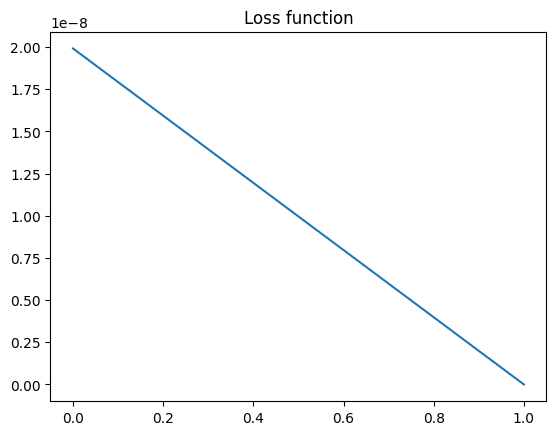

loss functions: 
[1.9919045890807166e-08, 1.1472571224108579e-15]
[0, 0, 0, 0, 0, 1, 0, 0] 5
Accuracy: 30.0% (12 in 58 of 158)
Accuracy: 40.0% (16 in 63 of 158)
Accuracy: 20.0% (8 in 36 of 158)
Accuracy: 0.0% (0 in 1 of 158)
Accuracy: 0.0% (0 in 0 of 158)



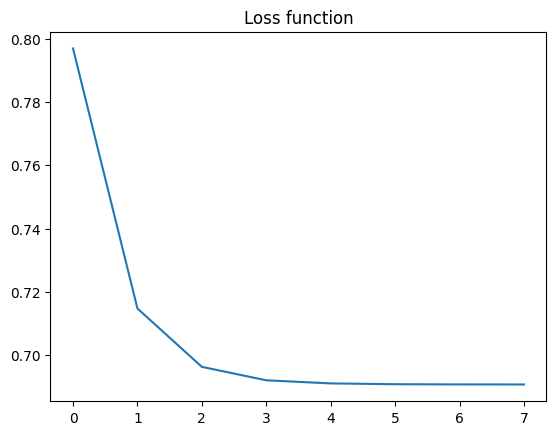

loss functions: 
[0.7968611970652053, 0.7147517242616627, 0.6963194454930167, 0.6920696741011443, 0.6910891287195873, 0.6908354396151157, 0.6907687003467602, 0.6907510977691024]
[0, 0, 0, 0, 0, 0, 1, 0] 6
Accuracy: 32.5% (13 in 75 of 158)
Accuracy: 42.5% (17 in 63 of 158)
Accuracy: 0.0% (0 in 0 of 158)
Accuracy: 5.0% (2 in 11 of 158)
Accuracy: 10.0% (4 in 9 of 158)



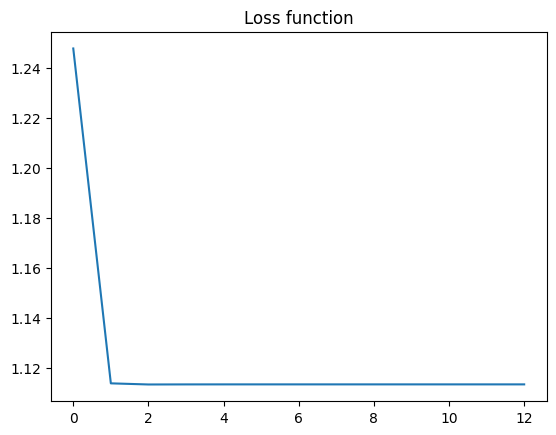

loss functions: 
[1.2478730869695345, 1.1137718175845244, 1.1133191270073448, 1.113349007697238, 1.1133564963732265, 1.1133581468801028, 1.113358520429905, 1.113358607810694, 1.113358628703374, 1.1133586337607606, 1.1133586349929414, 1.113358635294144, 1.1133586353678944]
[0, 0, 0, 0, 0, 0, 0, 1] 7
Accuracy: 80.0% (32 in 127 of 158)
Accuracy: 10.0% (4 in 31 of 158)
Accuracy: 0.0% (0 in 0 of 158)
Accuracy: 0.0% (0 in 0 of 158)
Accuracy: 0.0% (0 in 0 of 158)



In [12]:
identity_mapping = {iden: idx for idx, iden in enumerate(identity)}
for i in range(len(cluster_fields)):
    __weight = [0] * len(cluster_fields)
    __weight[i] = 1
    ssmc_fcm = SSMC_FCM(
        dataset=dataset, 
        fields_len=data_field_len, 
        fields_weight=__weight,
        n_clusters=5, 
        identity=identity,
        supervised_set=supervised_set, 
    )
    ssmc_fcm.clustering()
    ssmc_fcm.show_loss_function()
    print(__weight, i)
    for cluster in ssmc_fcm.pred_labels:
        count = sum([cluster.count(x) for x in result_set])
        print(f"Accuracy: {round(100 * count / len(result_set), 2)}% ({count} in {len(cluster)} of {len(ssmc_fcm.dataset)})")
        # display(excel_data_df.loc[[identity.index(i) for i in cluster]].iloc[:, [1, cluster_fields[i]]])
    print()